# **Funciones de Pérdida en Redes Neuronales**

## **¿Qué es una función de pérdida?**

Es un método que evalua la eficacia del algoritmo para modelar un conjunto de datos. Se trata de una métrica matemática que mide el nivel de error o discrepancia entre las predicciones de un modelo de aprendizaje automático y los valores reales que se espera que el modelo prediga. Son esenciales para entrenar modelos de machine learning, ya que el entrenamiento consiste en minimizar esta función.

Si las predicciones son totalmente erróneas, la función de pérdida generará un valor mayor. Si son bastante acertadas, generará un valor menor. A medida que se modifican aspectos del algoritmo para intentar mejorar el modelo, la función de pérdida indica si se está avanzando.

## **Tipos Comunes de Funciones de Pérdida**

Muchas de las funciones de pérdida implementadas en el aprendizaje automático pueden resultar complejas y confusas. Pero si recuerda el objetivo final de todas ellas (medir el rendimiento de su algoritmo en su conjunto de datos), podrá controlar esa complejidad.

Segun el problema que deseamos resolver, podemos clasificar las funciones de perdida en: 

### **Para Problemas de Regresión**

Las siguientes funciones se utilizan cuando la variable objetivo es continua, tipico en problemas de regresion. 

#### 1. _Error Cuadrático Medio (MSE)_

Mide la diferencia entre los valores predichos por un modelo y los valores reales, elevando al cuadrado cada error individual para penalizar errores grandes. 

Es util cuando se busca minimizar grandes errores (es decir, evitar predicciones muy alejadas del valor real) o si los errores extremos son costosos.

La formula que lo define es la siguiente:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

En Keras se obtiene como: `mean_squared_error`


#### 2. Error Absoluto Medio (MAE)

Mide el promedio de las diferencias absolutas entre los valores reales y los valores predichos.

Se utiliza cuando se necesita una medida robusta ante outliers o cuando todos los errores importan por igual, sin querer penalizar más los errores grandes.

La formula que lo define es la siguiente

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

En Keras se obtiene como: `mean_absolute_error`

### **Para Problemas de Clasificación**

Las siguientes funciones se utilizan cuando la variable objetivo es discreta, tipico en problemas de clasificacion. 


#### 1. Entropía Cruzada Binaria (Binary Crossentropy)

Mide la diferencia entre la probabilidad real (etiquetas) y la probabilidad predicha por el modelo. Penaliza fuertemente cuando el modelo está muy seguro de una predicción incorrecta.

Se utiliza en modelos de clasificación binaria y cuando el modelo predice probabilidades (no clases directamente).  Ideal cuando se desea que el modelo sea probabilísticamente confiable.

La formula que lo define es la siguiente:

$$\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Donde;

$n$: número de muestras.

$y_i$: valor real de la clase para la muestra $i$ $(0\ o\ 1)$.

$\hat{y}_i$: probabilidad predicha por el modelo para la clase positiva $(1)$, es decir, $\hat{y}_i ∈[0,1] $

$\text{log}$: el logaritmo natural.


En Keras se encuentra como: `binary_crossentropy`

#### 2.  Entropía Cruzada Categórica (Categorical Crossentropy)

Mide la diferencia entre la distribución real de clases (etiquetas verdaderas) y la distribución predicha por el modelo (probabilidades). Penaliza fuertemente cuando el modelo predice baja probabilidad para la clase verdadera.

Se utiliza principalmente en problemas de clasificación multiclase. Tambien cuando el target está codificado en one-hot o como índices enteros de clases. Se aplica junto con softmax como función de activación en la capa de salida.

Su formula es la siguiente:


$$\text{CCE} = -\sum_{i=1}^{n} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic})$$

Donde:

$n$: es el número de muestras.

$C$: es el número de clases.

$y_{ic}$: es el valor real ($1$ si la muestra $i$ pertenece a la clase $c$, de lo contrario $0$).

$\hat{y}_{ic}$: es la probabilidad predicha para que la muestra $i$ pertenezca a la clase $c$.

En Keras se encuentra como: `categorical_crossentropy`

#### 3.  Sparse Categorical Crossentropy

Compara la probabilidad predicha para la clase correcta (índice entero) con las probabilidades calculadas por el modelo (softmax). Penaliza más cuando el modelo da baja probabilidad a la clase verdadera.

Se usa en problemas de clasificación multiclase donde las etiquetas verdaderas son enteros (clases codificadas como 0, 1, 2, ...) en lugar de vectores one-hot.

La formula que lo define es la siguiente:

$$\text{Sparse CCE} = -\sum_{i=1}^{n} \log(\hat{y}_{i, y_i})$$

Donde:

$n$: es el número de muestras.

$y_i$: es la clase verdadera de la muestra $i$, expresada como un índice entero en el rango $[0 , C−1]$, donde $C$ es el número de clases.

$\hat{y}_{i, y_i}$: es la probabilidad predicha por el modelo para la clase verdadera $y_i$ de la muestra $i$.

En Keras se enuentra como: `sparse_categorical_crossentropy`

## **Ejemplo desde la intuición**

Supón que para una muestra el valor real es $y_i = 1$ (`clase 1`), y el modelo predice $\hat{y}_i = 0.9$ (una probabilidad alta de ser 1). Entonces, para este caso, usamos la funcion de perdida _BCE_ cuya formula es la siguiente:

$$\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Sustituyendo los valores a la formula obtenemos:

$$\text{BCE} = 1. \log(0.9) + (1 - 1) \log(1 - 0.9)$$


la parte de la fórmula relevante sería:

$$y_i. \text{log}(\hat{y}_i)\ =\ 1\ \text{x}\ \text{log}(0.9)\ =\ \text{log}(0.9)\ \thickapprox\ -0.105$$

**Interpretación**: *Este valor negativo pequeño indica que el modelo hizo una buena predicción*.

Si en cambio el modelo predice $\hat{y}_i = 0.1$ (una probabilidad baja de ser 1), entonces:

$$\text{BCE} = 1. \log(0.1) + (1 - 1) \log(1 - 0.1)$$

Al calcular solo la parte relevante de la formula obtenemos:

$$y_i. \text{log}(\hat{y}_i)\ =\ 1\ . \text{log}(0.1)\ =\ \text{log}(0.1)\ \thickapprox\ -2.3$$

**Interpretación**: *Este valor negativo grande indica que el modelo hizo una mala predicción*.

**Para el caso en que la etiqueta de la muestra evaluada sea `clase 0`**

Utilizamos la formula de _BCE_:

$$\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Para este caso $y_i$ = 0 y el modelo predice $\hat{y}_i = 0.1$ (una probabilidad baja de ser 1), entonces:

$$\text{BCE} = 0. \log(0.1) + (1 - 0) \log(1 - 0.1)$$

Haciendo el calculo de la parte mas relevante de la formula obtenemos:

$$(1 - y_i). \text{log}(\hat{y}_i)\ =\ (1 - 0)\ . \text{log}(0.9)\ =\ \text{log}(0.9)\ \thickapprox\ -0.105$$



**Interpretación**: *Este valor negativo pequeño indica que el modelo hizo una buena predicción*.

> De esta forma, probamos que la funcion de perdida nos indica aue tan eficiente es el modelo para lograr buenas predicciones. El objetivo ultimos de los modelos de IA es minimizar, lo mas posible, la funcion de perdida ajustando sus parametros para asi lograr un buen rendimiento.

## **Ejemplos Prácticos:**

#### Ejemplo 1: _Función de Pérdida de Regresión (MSE)_

Vamos a entrenar una red neuronal simple para que aprenda de una relación lineal con ruido entre variables simuladas. Esto con el objetivo de mostrar como la funcion de perdida disminuye a medida que el modelo aprende bien de los datos. 

/home/jbernal/anaconda3/envs/tf_cpu_3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


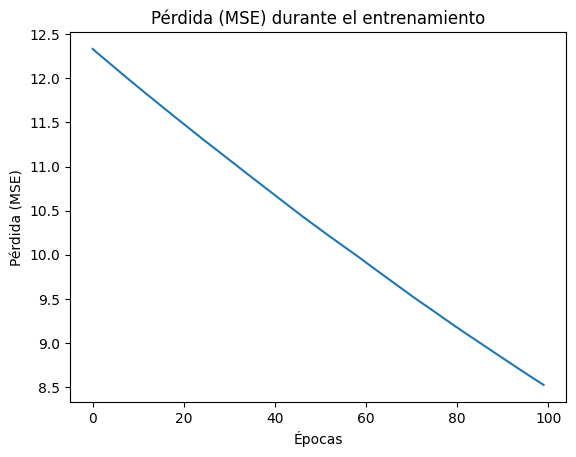

In [ ]:
# importar librerias de interes 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generar datos simulados
X = np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.1  # Relación lineal con algo de ruido

# Definir un modelo simple de red neuronal
model = Sequential([
    Dense(1, input_dim=1)
])

# Compilar el modelo con la función de pérdida MSE
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con 100 epocas
history = model.fit(X, y, epochs=100, verbose=0)

# Graficar la pérdida durante el entrenamiento
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Pérdida (MSE) durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.show()


> Vemos como la perdida va diminuyendo a medida que transcurren las epocas.

> La perdida es lineal debido a que estamos tratando con un modelo de una sola neurona.

> El concepto de epoca aca, es importante: representa una pasada completa de todos los datos de entrenamiento por el modelo. El modelo aprende poco a poco ajustando sus pesos después de ver cada lote de datos (batch). Una sola pasada no suele ser suficiente para encontrar buenos valores de los parámetros. Por eso se hacen múltiples épocas.

#### Ejemplo 2: _Función de Pérdida para Clasificación (Entropía Cruzada Binaria)_

/home/jbernal/anaconda3/envs/tf_cpu_3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


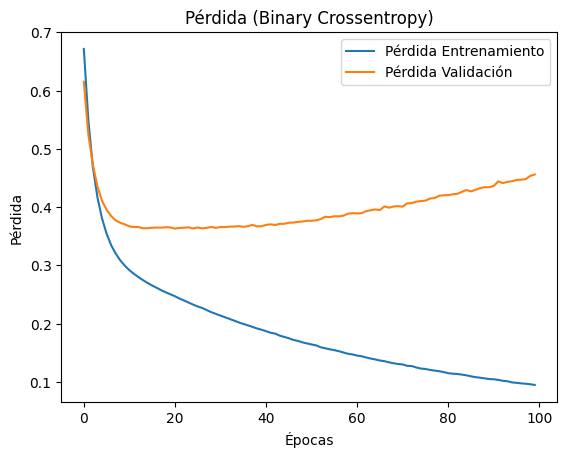

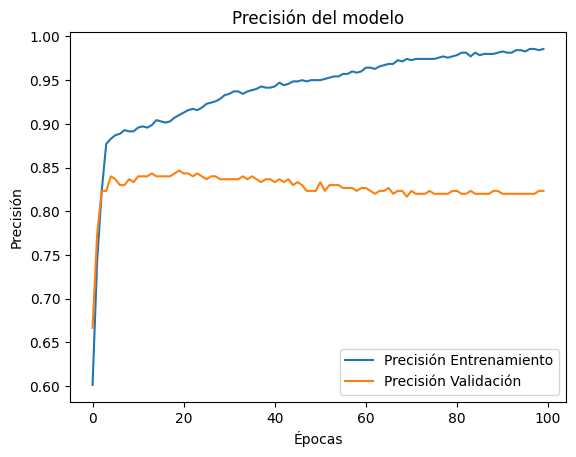

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Generar datos simulados de clasificación binaria
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo simple para clasificación
model = Sequential([
    Dense(64, activation='relu', input_dim=20),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilar el modelo con Binary Crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Graficar la pérdida y la precisión durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida (Binary Crossentropy)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()
